In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from statistics import mean 

In [72]:
#импорт дата сета
df_car = pd.read_csv('cars.csv')

In [73]:
df_car.head(5)

,id,price,year,mileage,diesel,hybrid,mt,front.drive,rear.drive,engine.power,engine.capacity,sedan,hatchback,wagon,coupe,cabriolet,minivan,pickup
0,1,1490000.0,2012,30000.0,0,0,0,0,1,184,1.8,0,0,0,1,0,0,0
1,2,1320000.0,2011,72088.0,0,0,0,0,0,272,3.5,1,0,0,0,0,0,0
2,3,1399000.0,2012,42500.0,0,0,0,0,1,184,1.8,1,0,0,0,0,0,0
3,4,1125000.0,2010,23000.0,0,0,0,0,1,184,1.8,1,0,0,0,0,0,0
4,5,1249000.0,2012,48000.0,0,0,0,0,1,184,1.8,0,0,0,1,0,0,0


In [74]:
#исследуем дата сет
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359 entries, 0 to 358
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               359 non-null    int64  
 1   price            359 non-null    float64
 2   year             359 non-null    int64  
 3   mileage          359 non-null    float64
 4   diesel           359 non-null    int64  
 5   hybrid           359 non-null    int64  
 6   mt               359 non-null    int64  
 7   front.drive      359 non-null    int64  
 8   rear.drive       359 non-null    int64  
 9   engine.power     359 non-null    int64  
 10  engine.capacity  359 non-null    float64
 11  sedan            359 non-null    int64  
 12  hatchback        359 non-null    int64  
 13  wagon            359 non-null    int64  
 14  coupe            359 non-null    int64  
 15  cabriolet        359 non-null    int64  
 16  minivan          359 non-null    int64  
 17  pickup          

In [75]:
#переименуем колонки с . в имени
df_car = df_car.rename(columns={"front.drive": "front_drive", "rear.drive": "rear_drive", "engine.power": "engine_power", "engine.capacity": "engine_capacity"})

In [76]:
df_car.describe()

,id,price,year,mileage,diesel,hybrid,mt,front_drive,rear_drive,engine_power,engine_capacity,sedan,hatchback,wagon,coupe,cabriolet,minivan,pickup
count,359.000000,3.590000e+02,359.000000,359.000000,359.000000,359.0,359.0,359.000000,359.000000,359.000000,359.000000,359.000000,359.0,359.000000,359.000000,359.0,359.0,359.0
mean,180.000000,1.202165e+06,2011.050139,85651.972145,0.041783,0.0,0.0,0.011142,0.807799,205.838440,2.214485,0.827298,0.0,0.016713,0.155989,0.0,0.0,0.0
std,103.778611,1.556460e+05,0.889255,35548.245979,0.200372,0.0,0.0,0.105113,0.394580,35.032014,0.670205,0.378517,0.0,0.128373,0.363351,0.0,0.0,0.0
min,1.000000,7.990000e+05,2010.000000,5000.000000,0.000000,0.0,0.0,0.000000,0.000000,170.000000,1.800000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
25%,90.500000,1.100000e+06,2010.000000,64500.000000,0.000000,0.0,0.0,0.000000,1.000000,184.000000,1.800000,1.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
50%,180.000000,1.200000e+06,2011.000000,80888.000000,0.000000,0.0,0.0,0.000000,1.000000,184.000000,1.800000,1.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
75%,269.500000,1.307500e+06,2012.000000,100500.000000,0.000000,0.0,0.0,0.000000,1.000000,231.000000,3.000000,1.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
max,359.000000,1.500000e+06,2014.000000,270000.000000,1.000000,0.0,0.0,1.000000,1.000000,306.000000,3.600000,1.000000,0.0,1.000000,1.000000,0.0,0.0,0.0


# Выводы
Атрибуты hybrid, mt, hatchback, cabriolet, minivan, pickup заполнены только нулевыми значениями, а значит не влияют на выводы по предоставленному датасету. 
Для обучения модели их можно исключить. 

In [77]:
#добавляем столбцы с годом и ценой продажи и предзаполняем их
df_car['sell_year'] = 0
df_car['sell_price'] = 0

for i in range(11):
    tmp = random.randint(0, 358)
    while (df_car.loc[tmp, 'sell_year'] != 0):
        tmp = random.randint(0, 358)
    df_car.loc[tmp, 'sell_year'] = 2019 
    df_car.loc[tmp, 'sell_price'] = 1.14 * int(df_car.loc[tmp, 'price'])

for i in range(9):
    tmp = random.randint(0, 358)
    while (df_car.loc[tmp, 'sell_year'] != 0):
        tmp = random.randint(0, 358)
    df_car.loc[tmp, 'sell_year'] = 2020 
    df_car.loc[tmp, 'sell_price'] = 1.16 * int(df_car.loc[tmp, 'price'])
  

### Задача финансового директора
Цель: 
Увеличить прибыль компании.
Решение:
Проведем анализ цены продажи относительно цены покупки за отчетный период. Покажем динамику между отчетными периодами.

In [78]:
df_1 = df_car.groupby('sell_year')['price','sell_price'].sum()
df_1 = df_1.reset_index()
df_1 = df_1.drop(0)
df_1['profit'] = (df_1['sell_price'] / df_1['price'] - 1) * 100

<ipython-input-78-3000044405e8>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_1 = df_car.groupby('sell_year')['price','sell_price'].sum()


In [79]:
#Отчет по динамике прибыли
df_1.head()

,sell_year,price,sell_price,profit
1,2019,12903777.0,14710305.78,14.0
2,2020,11029000.0,12793640.00,16.0


In [80]:
df_1.drop(['price', 'sell_price'], axis='columns', inplace=True)

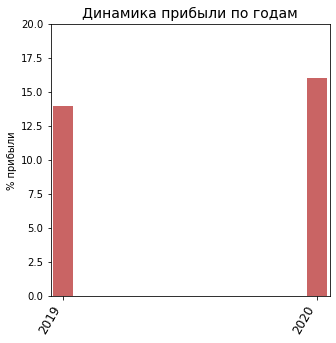

In [81]:
fig, ax = plt.subplots(figsize=(5,5))
ax.vlines(x = df_1.sell_year, ymin = 0, ymax = df_1.profit, color='firebrick', alpha=0.7,  linewidth=20)
plt.xticks(df_1.sell_year, df_1.sell_year, rotation=60, horizontalalignment='right', fontsize=12)
ax.set_title('Динамика прибыли по годам', fontdict={'size':14})
ax.set(ylabel='% прибыли', ylim=(0, 20))

plt.show()

### Задача финансового директора
Цель: Планирование бюджета на следующий год. Предсказание стоимости автомобилей для составление бюджета компании на закупку.

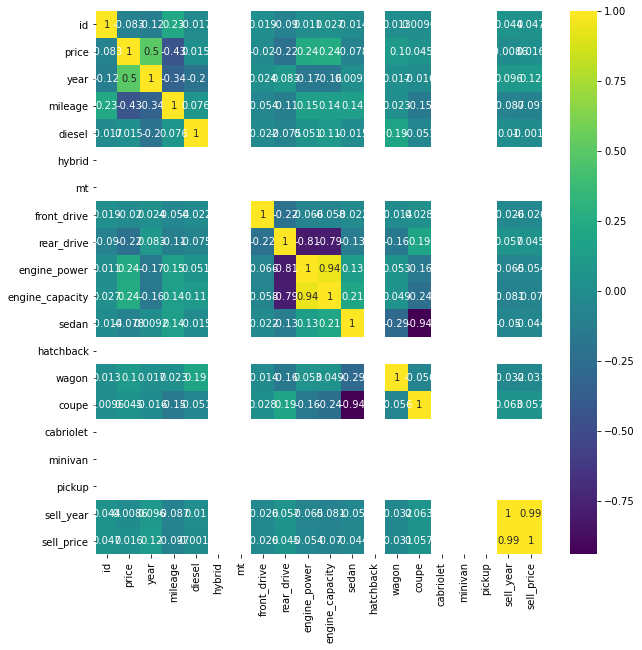

In [82]:
#построим матрицу корреляций
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(df_car.corr(),  cmap = 'viridis',annot = True)

In [6]:
df_car.corr()

,id,price,year,mileage,diesel,hybrid,mt,front.drive,rear.drive,engine.power,engine.capacity,sedan,hatchback,wagon,coupe,cabriolet,minivan,pickup,sell_year,sell_price
id,1.000000,-0.083408,-0.119982,0.226119,-0.017463,NaN,NaN,0.018949,-0.090384,0.011156,0.027474,-0.013724,NaN,0.013419,0.009556,NaN,NaN,NaN,-0.059544,-0.066847
price,-0.083408,1.000000,0.504586,-0.428724,0.014716,NaN,NaN,-0.020311,-0.217536,0.238168,0.241897,-0.078314,NaN,0.104291,0.044736,NaN,NaN,NaN,0.049427,0.087493
year,-0.119982,0.504586,1.000000,-0.335208,-0.199911,NaN,NaN,0.023890,0.083267,-0.165620,-0.163388,0.009200,NaN,0.017108,-0.015628,NaN,NaN,NaN,0.013646,0.026152
mileage,0.226119,-0.428724,-0.335208,1.000000,0.075891,NaN,NaN,-0.053531,-0.114429,0.147186,0.139584,0.138432,NaN,0.023130,-0.152382,NaN,NaN,NaN,0.053893,0.032194
diesel,-0.017463,0.014716,-0.199911,0.075891,1.000000,NaN,NaN,-0.022166,-0.074794,0.050707,0.107803,-0.015081,NaN,0.189964,-0.051405,NaN,NaN,NaN,0.070673,0.079305
hybrid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
front.drive,0.018949,-0.020311,0.023890,-0.053531,-0.022166,NaN,NaN,1.000000,-0.217616,-0.066264,-0.057809,-0.021707,NaN,-0.013839,0.027503,NaN,NaN,NaN,-0.025783,-0.025511
rear.drive,-0.090384,-0.217536,0.083267,-0.114429,-0.074794,NaN,NaN,-0.217616,1.000000,-0.809146,-0.786926,-0.129354,NaN,-0.156987,0.190217,NaN,NaN,NaN,0.026004,0.032971
engine.power,0.011156,0.238168,-0.165620,0.147186,0.050707,NaN,NaN,-0.066264,-0.809146,1.000000,0.943070,0.132286,NaN,0.052776,-0.156454,NaN,NaN,NaN,0.000426,-0.004580


## Вывод
Следующие параметры имеют высокую степень корреляции:
1) engine.power и engine.capacity  - объясняемая корреляция. С увеличением объема двигателя увеличивается мощность двигателя. 
2) sell_year и sell_price - наценка в текущем году больше по сравнению с прошлым годом.

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [84]:
#удалим из датасета параметры, имеющие нулевые значения, год продажи, id
df_X = df_car.drop(columns = ['id','hybrid', 'mt', 'hatchback', 'cabriolet', 'minivan', 'pickup','sell_year'])
#оставим для обучения модели только те строки, где известна цена продажи
df_X = df_X[df_X.sell_price != 0]

In [85]:
X = df_X.drop(columns = ['sell_price'])
y = df_X['sell_price']

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [87]:
#посмотрим на модель линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [88]:
r2_score(y_test, y_pred)
#коэффициент детерминации

0.9684089434037633

In [89]:
mean_squared_error(y_test, y_pred)
#средняя квадратическая ошибка

298173916.4163998

In [90]:
#посмотрим на модель дерева решений
model_tr = DecisionTreeRegressor()
model_tr.fit(X_train, y_train)
y_pred_tr = model_tr.predict(X_test) 

In [91]:
r2_score(y_test, y_pred_tr)
#коэффициент детерминации

0.7660616291103503

In [92]:
mean_squared_error(y_test, y_pred_tr)
#средняя квадратическая ошибка

2208040115.2694774

## Вывод
Исходя из метрик можно сделать вывод о том, что Линейная регрессия показала лучший результат, поэтому выбираем ее.

In [93]:
#определим бюджет на покупку автомобилей в следующем году для 8 машин
n = 8

In [94]:
budget = {}
df_budget = df_car.drop(columns = ['id','hybrid', 'mt', 'hatchback', 'cabriolet', 'minivan', 'pickup','sell_price'])
for i in range(n):
    tmp = random.randint(0, 358)
    while (df_budget.loc[tmp, 'sell_year'] != 0):
        tmp = random.randint(0, 358)
    df_tmp = df_budget.loc[[tmp]]
    df_tmp = df_tmp.drop(columns = ['sell_year'])
    budget[df_budget.loc[tmp, 'price']] =  int(model.predict(df_tmp))

In [95]:
print("Бюджет на следующий год")
print(f"Количество автомобилей - {n}")
print(f"Средняя цена покупки - {mean(budget.keys()).round(2)}")
print(f"Средняя цена продажи - {round(mean(budget.values()),2)}")
print(f"Бюджет на закупку {n} автомобилей - {sum(budget.keys()).round(2) * 1.15 }")

Бюджет на следующий год
Количество автомобилей - 8
Средняя цена покупки - 1172857.14
Средняя цена продажи - 1350140.43
Бюджет на закупку 8 автомобилей - 9441500.0


### Задача менеджера подборщика
Цель: 
Поиск автомобилей с минимальной ценой по заданным параметрам.

In [96]:
to_search = [2011, 72088.0, 0, 0, 0, 0, 0, 272, 3.5, 1, 0, 0, 0, 0, 0, 0]

## определяем, вес параметров при поиске
1. тип кузова
2. тип двигателя
3. год выпуска
4. мощность двигателя
5. пробег



In [55]:
# функция проверяет, можно ли искать дальше
def if_found(df_if):
    if len(df_if) == 1:
        return 0
    elif len(df_m) == 0:
        print('########################################')
        print("По заданным параметрам ничего не найдено")
        print('########################################')
        return 0
    else:
        return len(df_if)

In [57]:
df_m = df_car[df_car.sell_price == 0]
df_m = df_m[(df_m.sedan == to_search[9]) & (df_m.hatchback == to_search[10]) & (df_m.wagon == to_search[11]) & (df_m.coupe == to_search[12]) & (df_m.cabriolet == to_search[13]) & (df_m.minivan == to_search[14])]
tmp = if_found(df_m)
if tmp != 0:
    df_m = df_m[(df_m.diesel == to_search[2]) & (df_m.hybrid == to_search[3])]
    tmp = if_found(df_m)
if tmp != 0:
    df_m = df_m[df_m.year >= to_search[0]]
    tmp = if_found(df_m)
if tmp != 0:
    df_m = df_m[df_m.engine_power >= to_search[7]]
    tmp = if_found(df_m)
if tmp != 0:
    df_m = df_m[df_m.mileage <= to_search[1]]
    print('#######################################')
    print(f'Найдено {len(df_m)} автомобилей по основным параметрам. Продолжить поиск? (y/n)')
    print('#######################################')
    tmp_s = str(input()) 
    if tmp_s == 'y':
        tmp = if_found(df_m)
    else:
        tmp = 0
if tmp != 0:
    df_m = df_m[df_m.mt <= to_search[4]]
    tmp = if_found(df_m)
if tmp != 0:
    df_m = df_m[(df_m.front_drive == to_search[5]) & (df_m.rear_drive == to_search[6])]
    tmp = if_found(df_m)
if tmp != 0:
    df_m = df_m[(df_car.front_drive == to_search[5]) & (df_m.rear_drive == to_search[6])]
    tmp = if_found(df_m)

# результат с наименьшей ценой
df_m[df_m.price == df_m['price'].min()]

#######################################
Найдено 3 автомобилей по основным параметрам. Продолжить поиск? (y/n)
#######################################
y


<ipython-input-57-a797b27cbd72>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_m = df_m[(df_car.front_drive == to_search[5]) & (df_m.rear_drive == to_search[6])]


,id,price,year,mileage,diesel,hybrid,mt,front_drive,rear_drive,engine_power,engine_capacity,sedan,hatchback,wagon,coupe,cabriolet,minivan,pickup,sell_year,sell_price
1,2,1320000.0,2011,72088.0,0,0,0,0,0,272,3.5,1,0,0,0,0,0,0,0,0.0
52,53,1320000.0,2011,70000.0,0,0,0,0,0,272,3.5,1,0,0,0,0,0,0,0,0.0


### Задача менеджера по продажам
Цель: 
Определить, возможно ли выполнить данный заказ и сколько будет примерно стоить автомобиль.

### Используем алгоритм поиска, определенный для задачи выше

In [97]:
to_search = [2012, 60000, 0, 0, 0, 0, 0, 200, 2, 1, 0, 0, 0, 0, 0, 0]

In [103]:
df_m2 = df_car[(df_car.sedan == to_search[9]) & (df_car.hatchback == to_search[10]) & (df_car.wagon == to_search[11]) & (df_car.coupe == to_search[12]) & (df_car.cabriolet == to_search[13]) & (df_car.minivan == to_search[14])]
tmp = if_found(df_m2)
if tmp != 0:
    df_m2 = df_m2[(df_m2.diesel == to_search[2]) & (df_m2.hybrid == to_search[3])]
    tmp = if_found(df_m2)
if tmp != 0:
    df_m2 = df_m2[df_m2.year >= to_search[0]]
    tmp = if_found(df_m2)
if tmp != 0:
    df_m2 = df_m2[df_m2.engine_power >= to_search[7]]
    tmp = if_found(df_m2)
if tmp != 0:
    df_m2 = df_m2[df_m2.mileage <= to_search[1]]
    print('#######################################')
    print(f'Найдено {len(df_m2)} автомобилей по основным параметрам. Продолжить поиск? (y/n)')
    print('#######################################')
    tmp_s = str(input()) 
    if tmp_s == 'y':
        tmp = if_found(df_m2)
    else:
        tmp = 0
if tmp != 0:
    df_m2 = df_m2[df_m2.mt <= to_search[4]]
    tmp = if_found(df_m2)
if tmp != 0:
    df_m2 = df_m2[(df_m2.front_drive == to_search[5]) & (df_m2.rear_drive == to_search[6])]
    tmp = if_found(df_m2)
if tmp != 0:
    df_m2 = df_m2[(df_m2.front_drive == to_search[5]) & (df_m2.rear_drive == to_search[6])]
    tmp = if_found(df_m2)


df_m2 = df_m2.drop(columns = ['id','hybrid', 'mt', 'hatchback', 'cabriolet', 'minivan', 'pickup','sell_price','sell_year'])

#######################################
Найдено 3 автомобилей по основным параметрам. Продолжить поиск? (y/n)
#######################################
y
#######################################
Найдено 3 автомобилей
#######################################


In [115]:
car_search = {}

for i in df_m2.index:
    car_search[df_m2.loc[i, 'price']] =  int(model.predict(df_m2.loc[[i]]))
    

print('#######################################')   
print(f"Средняя цена продажи - {round(mean(car_search.values()),2)}")
print('#######################################')
print(f'Найдено {len(df_m2)} автомобилей')
print('#######################################')

#######################################
Средняя цена продажи - 1606997
#######################################
Найдено 3 автомобилей
#######################################
